## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK 1: Image dimension, frequency distribution of intensities, range.

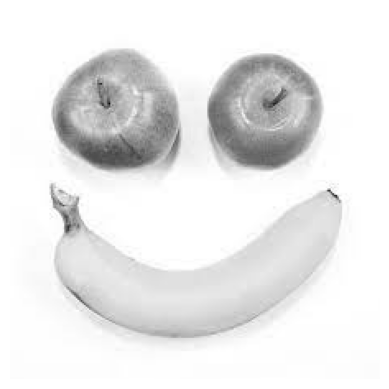

Image Dimensions: (225, 225)
Intensity Range: [5, 255]


In [21]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

height, width, color_channels = img.shape
print(f"Image Dimensions: {height,width}")
print(f"Intensity Range: [{img.min()}, {img.max()}]")

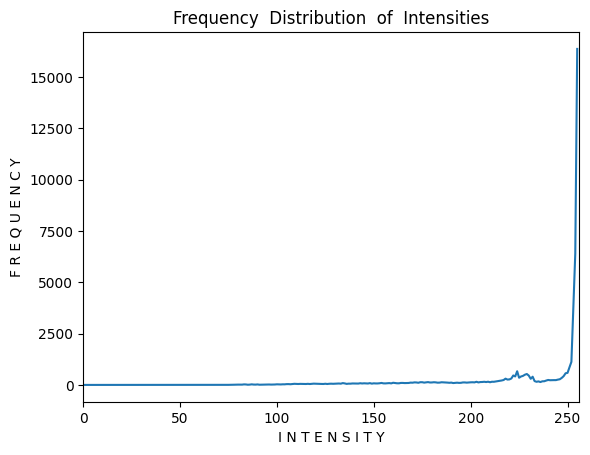

In [22]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Frequency  Distribution  of  Intensities")
plt.xlabel("I N T E N S I T Y")
plt.ylabel("F R E Q U E N C Y")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

# Task 2: Convert rgb image to gray scale image and compare a sub-region of the image by intensity values

In [23]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_02.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
def ConvertToGray(image):
  rows, cols, channels = image.shape

  gray_image = np.zeros((rows, cols))
  gray_image = gray_image.astype(np.uint8)
  for i in range(rows):
    for j in range(cols):
      r, g, b = image[i, j]
      gray_image[i, j] = r*0.29 + g*0.58 + b*0.11

  return gray_image

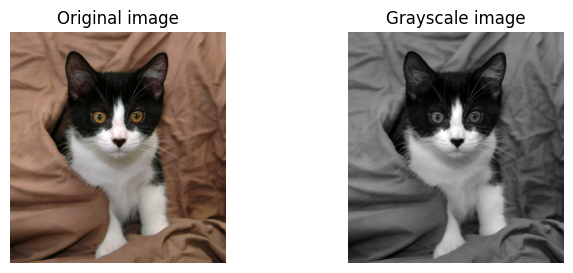

In [30]:
img_gray = ConvertToGray(img)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Grayscale image')
plt.axis('off')

plt.show()


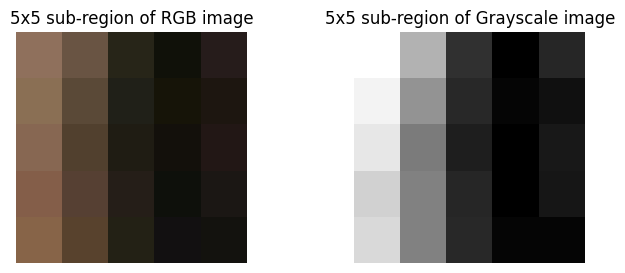

In [29]:
sub_region_rgb = img_rgb[100:105, 100:105]
sub_region_gray = img_gray[100:105, 100:105]

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(sub_region_rgb)
plt.title('5x5 sub-region of RGB image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sub_region_gray, cmap = 'gray')
plt.title('5x5 sub-region of Grayscale image')
plt.axis('off')

plt.show()

# Task 3: Apply image smoothing with appropriate kernel applied. Identify the noise(if any) before processing.

In [32]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_03.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**We can see salt and pepper noise from the given image (task 03), the white pixels are salt while the black pixels are called pepper.**

***We will use Median filter to remove the salt and paper noise as this filter works the best in removing this noise.***

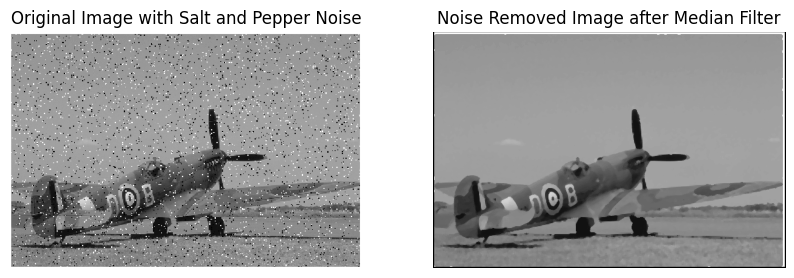

In [41]:
def median_blur(image, kernel_size):

  height, width = image.shape
  ksize_half = kernel_size // 2

  blurred_image = np.zeros_like(image)

  for y in range(ksize_half, height - ksize_half):
    for x in range(ksize_half, width - ksize_half):
      neighborhood = image[y - ksize_half:y + ksize_half + 1,
                          x - ksize_half:x + ksize_half + 1]

      neighborhood_flattened = neighborhood.flatten()
      median_value = np.median(neighborhood_flattened)
      blurred_image[y, x] = median_value

  return blurred_image


kernel_size = 4
blurred_image = median_blur(img_gray, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap ='gray')
plt.title('Original Image with Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap = 'gray')
plt.title('Noise Removed Image after Median Filter')
plt.axis('off')

plt.show()

# Task 4: Implement an appropriate technique to reduce the brightness of the provided image effectively.

In [48]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_04.jpg")
# the image is in bgr mode, converted to rgb:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

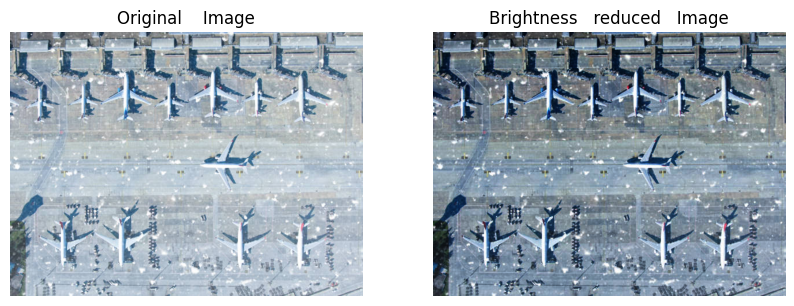

In [49]:
gamma = 2.0 #gamma>1 reduces brightness

normalized = img_rgb/255.0
# Gamma correction works on normalized intensity values.

corrected = normalized ** gamma
corrected = (corrected * 255)
img_darkened = corrected.astype(np.uint8)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original    Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_darkened)
plt.title('Brightness   reduced   Image')
plt.axis('off')

plt.show()

# Task 5: Solve the segmentation problem for the image

In [50]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_05.jpg")

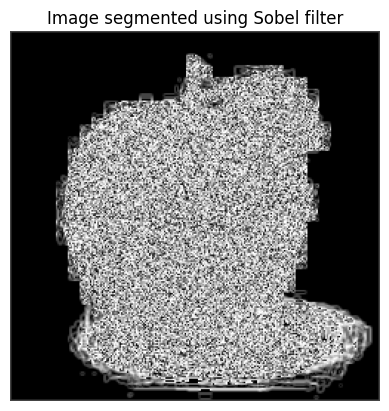

In [51]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

def convolve(image, kernel):
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                (kernel_width // 2, kernel_width // 2)),
                       mode='constant')

  convolved_image = np.zeros_like(image)

  for x in range(image_width):
    for y in range(image_height):
      region = padded_image[x:x+kernel_width, y:y+kernel_height]
      product = region * kernel
      convolved_image[x, y] = np.sum(product)

  return convolved_image

sobel_x = convolve(img_gray, sobel_x_kernel)
sobel_y = convolve(img_gray, sobel_y_kernel)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_clipped = np.clip(sobel_magnitude, 0, 255)
sobel_final = np.uint8(sobel_clipped)

plt.imshow(sobel_final, cmap='gray')
plt.axis('off')
plt.title('Image segmented using Sobel filter')
plt.show()